In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [6]:
print("GPU:", tf.config.list_physical_devices('GPU'))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


In [8]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0

print("After reshape:", x_train.shape)

After reshape: (60000, 784)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 [==============================] - 5s 2ms/step - loss: 0.2368 - accuracy: 0.9310 - val_loss: 0.1310 - val_accuracy: 0.9597
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9692 - val_loss: 0.1030 - val_accuracy: 0.9680
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9827 - val_loss: 0.0984 - val_accuracy: 0.9712
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0432 - accuracy: 0.9859 - val_loss: 0.1098 - val_accuracy: 0.9694
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.1014 - val_accuracy: 0.9750
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.1345 - val_accuracy:

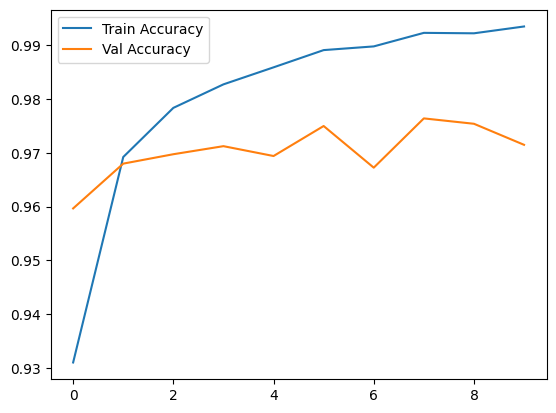

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 833us/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.99      0.98      0.98      1010
           4       0.95      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.99      0.96      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



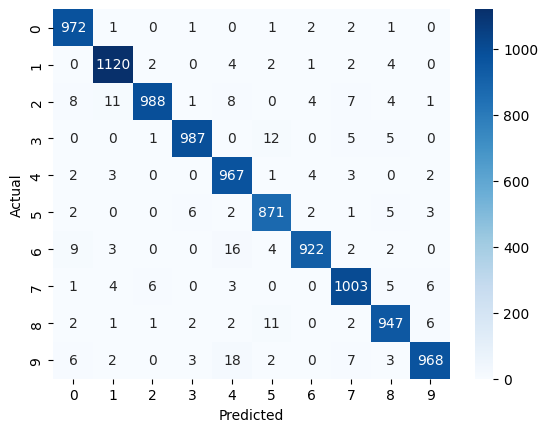

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()